<a href="https://colab.research.google.com/github/bunkorner/Colors/blob/master/Assignment_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
img1 = cv2.imread('gdrive/My Drive/CV/Lane.jpg')
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [ ]:
img2 = cv2.imread('gdrive/My Drive/CV/Lane.jpg')
img3 = cv2.imread('gdrive/My Drive/CV/Lane.jpg')

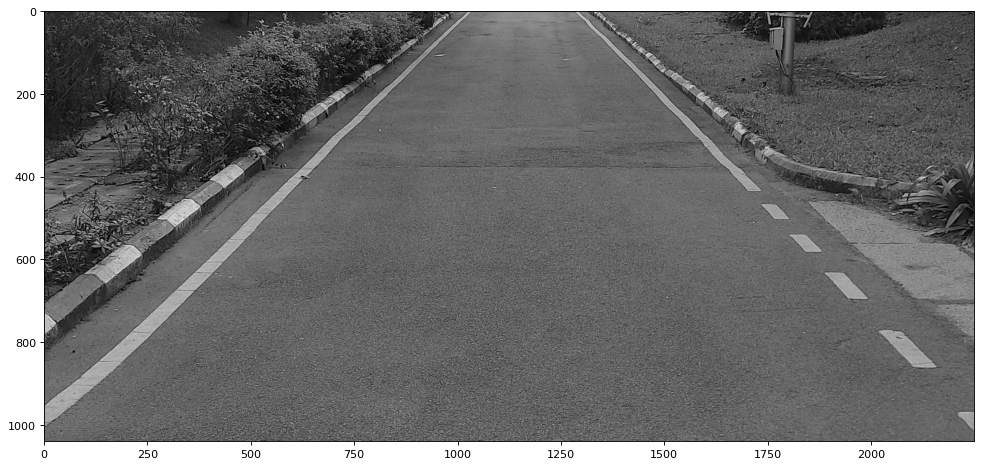

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
plt.imshow(gray, cmap="gray")

In [ ]:
blur = cv2.medianBlur(gray,15)

Blurring the image to remove noise

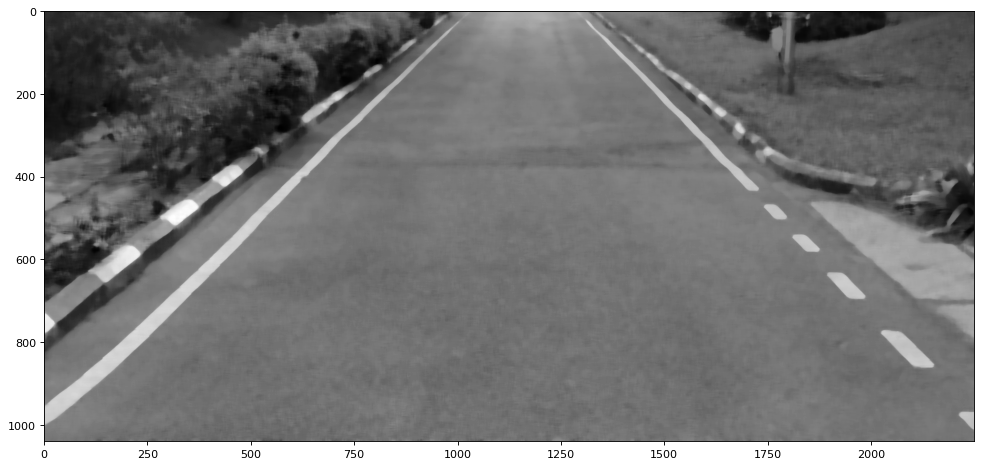

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
plt.imshow(blur, cmap="gray")

In [ ]:
canny_img = cv2.Canny(blur, 10, 130, apertureSize=3)

Detecting edges using Canny's edge detection

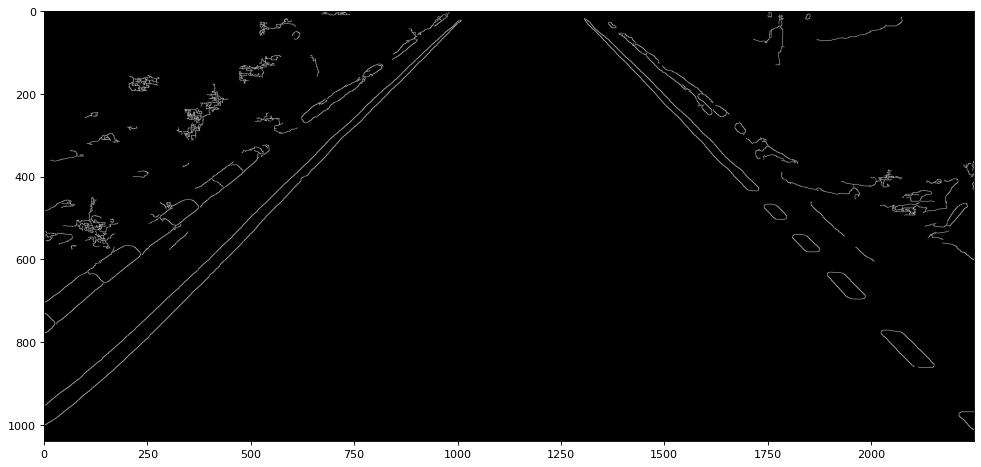

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
plt.imshow(canny_img, cmap="gray")

In [ ]:
h = canny_img.shape[0]
w = canny_img.shape[1]

In [ ]:
roi = [
    (0, h),
    (1150, -300),
    (w, h)
]

Defining the region of interest

In [ ]:
mask = np.zeros_like(canny_img)
cc = img1.shape[2]
mmc = (255,) * cc
cv2.fillPoly(mask, np.array([roi], np.int32), mmc)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

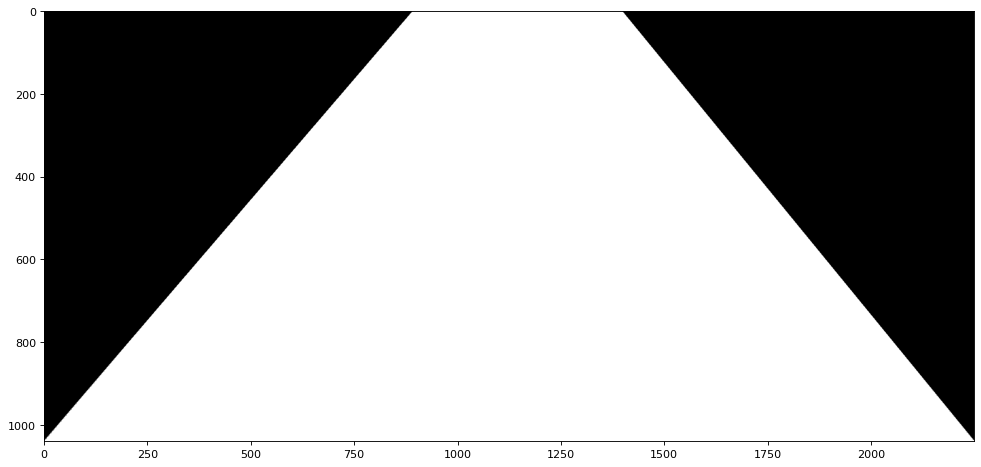

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
plt.imshow(mask, cmap="gray")

In [ ]:
masked = cv2.bitwise_and(canny_img, mask)

Performing 'bitwise and' with Region of interest

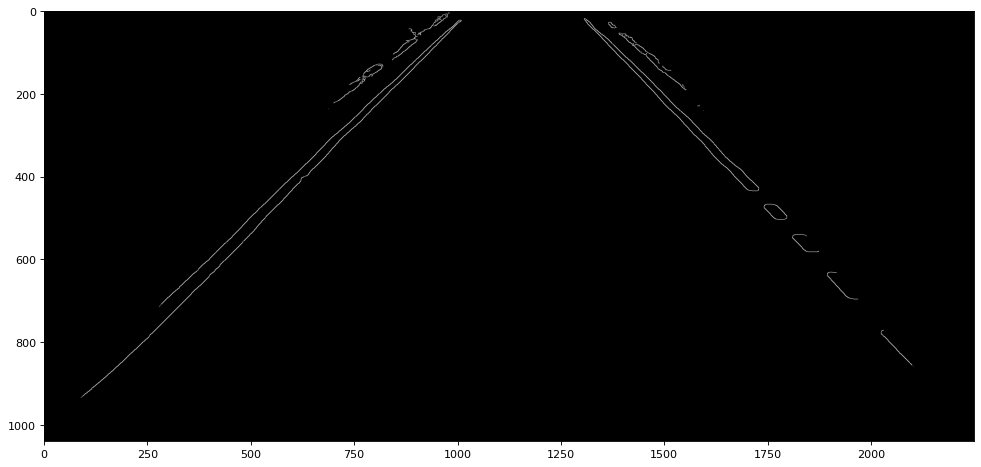

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
plt.imshow(masked, cmap="gray")

In [ ]:
lines = cv2.HoughLines(masked, 1, np.pi / 180, 150)

cv2.HoughLines() will return rho and theta of the lines

In [ ]:
import math

In [ ]:
if lines is not None:
  for i in range(0, len(lines)):
      rho = lines[i][0][0]
      theta = lines[i][0][1]
      a = math.cos(theta)
      b = math.sin(theta)
      x0 = a * rho
      y0 = b * rho
      pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
      pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
      cv2.line(img2, pt1, pt2, (0,0,255), 2)

This code snippet converts rho, theta to cartesian co-ordinate system and plotting it with cv2.line() function

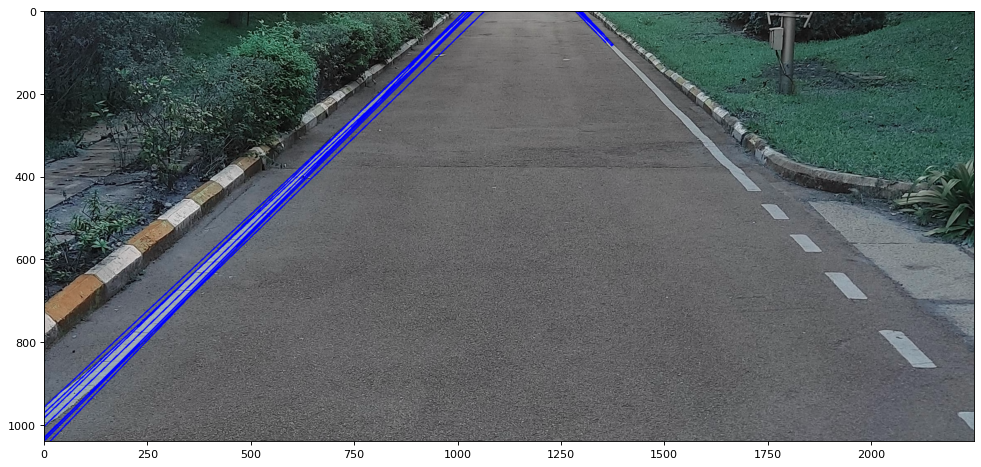

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
plt.imshow(img2, cmap="gray")

We can see clearly, the lanes are not detected properly. So we'll use HoughLinesP which is a Probablistic method and check its output.

In [ ]:
lines = cv2.HoughLinesP(masked,1,np.pi/180,100,minLineLength=10,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img3,(x1,y1),(x2,y2),(0,0,255),2)

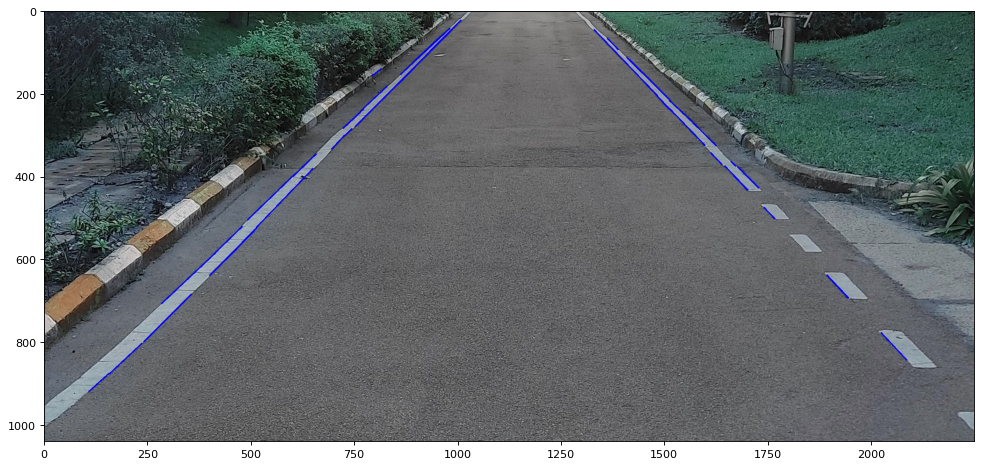

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
plt.imshow(img3, cmap="gray")

As we can see the output from this method is quite better than previous method